## Initialize - same modules Laura used

In [25]:
import sys

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print(sys.version)
%matplotlib inline

Pandas version: 0.17.1
Numpy version: 1.10.1
3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]


## Modified csv file - to include a few more columns


I added back some of the columns that look like they have the best stories to tell. We may be able to ditch the UniqueRecord and TotalFlights columns - both are artifacts of the way Tableau works. Also converted UniqueCarrier 2-ltr codes to chart-friendly airline names. 

In [27]:
flight_data = pd.read_csv('flight_delays_jws.csv')
flight_data.head()


UniqueRecord  DayofMonth  DayOfWeek UniqueCarrier TailNum OriginApt  \
0             1          11          6      American  N870AA       SFO   
1             2          12          7      American  N856AA       SFO   
2             3          13          1      American  N864AA       SFO   
3             4          14          2      American  N861AA       SFO   
4             5          15          3      American  N866AA       SFO   

  DestApt  DepDelay  ArrDelay  ArrDel15count ArrTimeBin  TOTAL FLIGHTS  \
0     DFW        -2       -18              0  1300-1359              1   
1     DFW        -7       -22              0  1300-1359              1   
2     DFW        -2        -6              0  1300-1359              1   
3     DFW        -8       -21              0  1300-1359              1   
4     DFW        -2       -11              0  1300-1359              1   

  OriginCityName        DestCityName  
0   San Francisco  Dallas/Fort Worth  
1   San Francisco  Dallas/Fort Worth  
2   San Francisco  Dallas/Fort Worth  
3   San Francisco  Dallas/Fort Worth  
4   San Francisco  Dallas/Fort Worth

This one shows why July Fourth is a great day to fly. 

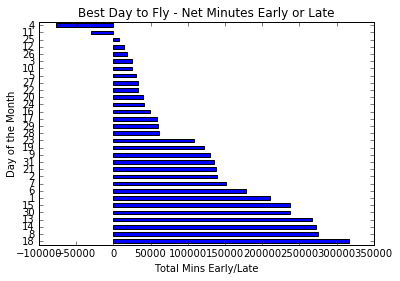

In [28]:
flight_data["ArrDelay"].groupby(flight_data["DayofMonth"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('graph1.png')

This one calls out the worst airplanes in the sky. (Not that you can look up tail numbers on Expedia.)

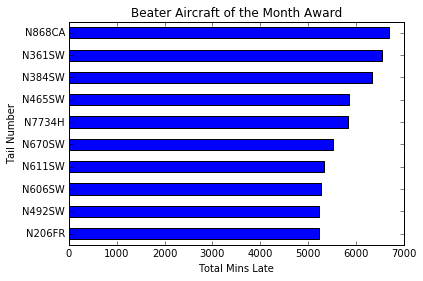

In [29]:
 flight_data["ArrDelay"].groupby(flight_data["TailNum"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .tail(10) \
                                   .plot(kind = 'barh', title='Beater Aircraft of the Month Award') \
                                   .set(xlabel="Total Mins Late", ylabel="Tail Number")


plt.savefig('graph2.png')

This on calls out airlines for total minutes of delay.


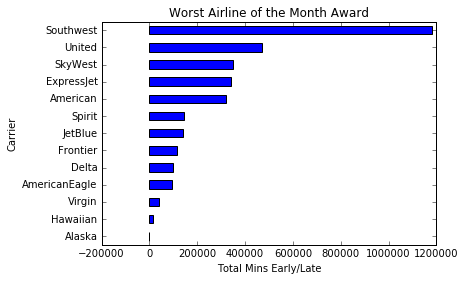

In [30]:
 flight_data["ArrDelay"].groupby(flight_data["UniqueCarrier"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Worst Airline of the Month Award') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Carrier")


plt.savefig('graph3.png')

This is Laura's look at avg delay by carrier

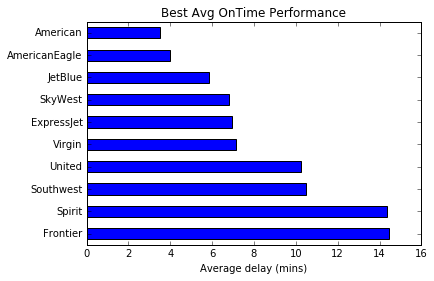

In [38]:
flight_data.ArrDelay.groupby(flight_data.UniqueCarrier) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Best Avg OnTime Performance') \
                                   .set(xlabel="Average delay (mins)", ylabel="")

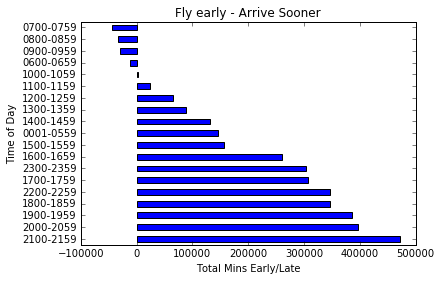

In [35]:
flight_data["ArrDelay"].groupby(flight_data["ArrTimeBin"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Fly early - Arrive Sooner') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Time of Day")


plt.savefig('graph1.png')